In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/drug_complete_dataset.csv',encoding='latin')

<ipython-input-6-ae503d8af1fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='viridis')


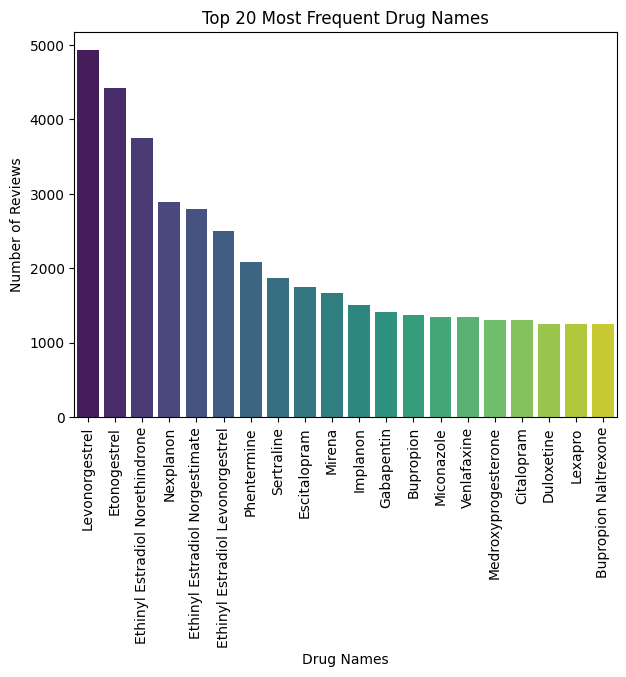

In [ ]:
# 1. Distribution of Drug Names
plt.figure(figsize=(7, 5))
top_drugs = df['drugName'].value_counts().head(20)
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='viridis')
plt.title('Top 20 Most Frequent Drug Names')
plt.xlabel('Drug Names')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

<ipython-input-8-81f4773becd6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.index, y=top_conditions.values, palette='magma')


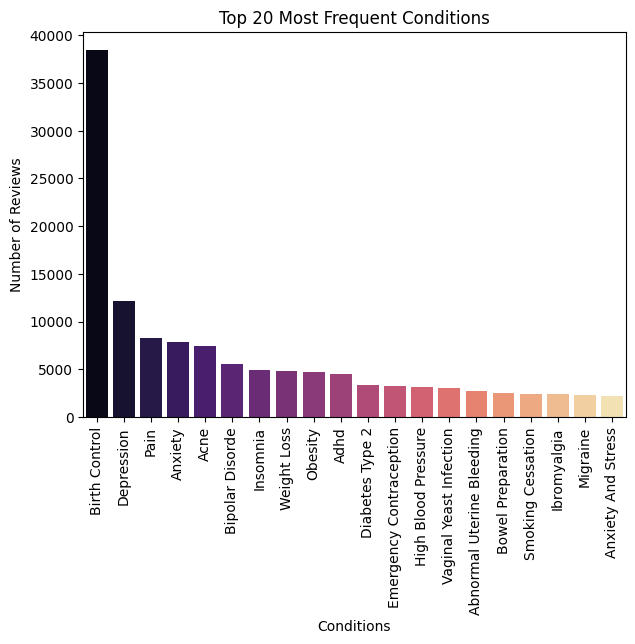

In [ ]:
# 2. Distribution of Conditions
plt.figure(figsize=(7, 5))
top_conditions = df['condition'].value_counts().head(20)
sns.barplot(x=top_conditions.index, y=top_conditions.values, palette='magma')
plt.title('Top 20 Most Frequent Conditions')
plt.xlabel('Conditions')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()


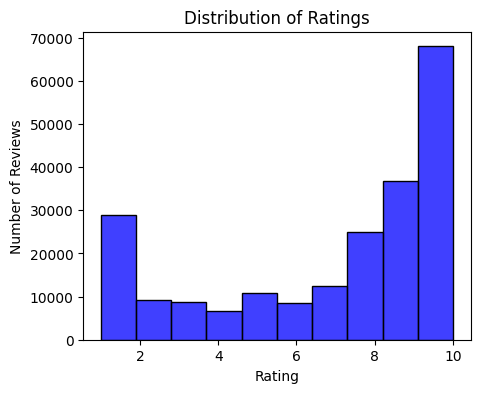

In [ ]:
# 3. Distribution of Ratings
plt.figure(figsize=(5, 4))
sns.histplot(df['rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

<ipython-input-11-81b36022b1ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='drugName', y='rating', data=top_drugs_ratings, palette='Set2')


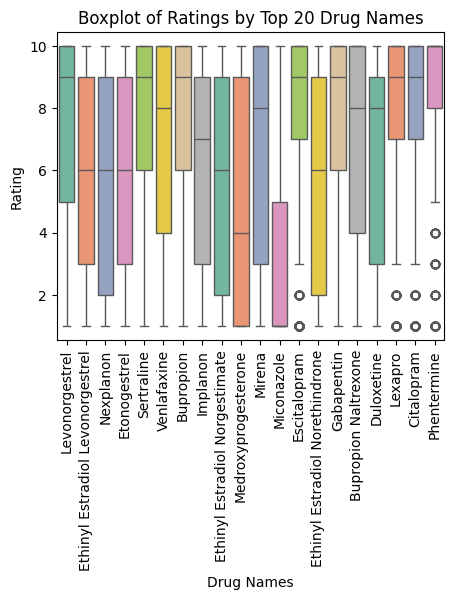

In [ ]:
# 4. Correlation Between Drug Names and Ratings
plt.figure(figsize=(5, 4))
top_drugs_ratings = df[df['drugName'].isin(top_drugs.index)]
sns.boxplot(x='drugName', y='rating', data=top_drugs_ratings, palette='Set2')
plt.title('Boxplot of Ratings by Top 20 Drug Names')
plt.xlabel('Drug Names')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

<ipython-input-12-3fe6114316cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='rating', data=top_conditions_ratings, palette='Set3')


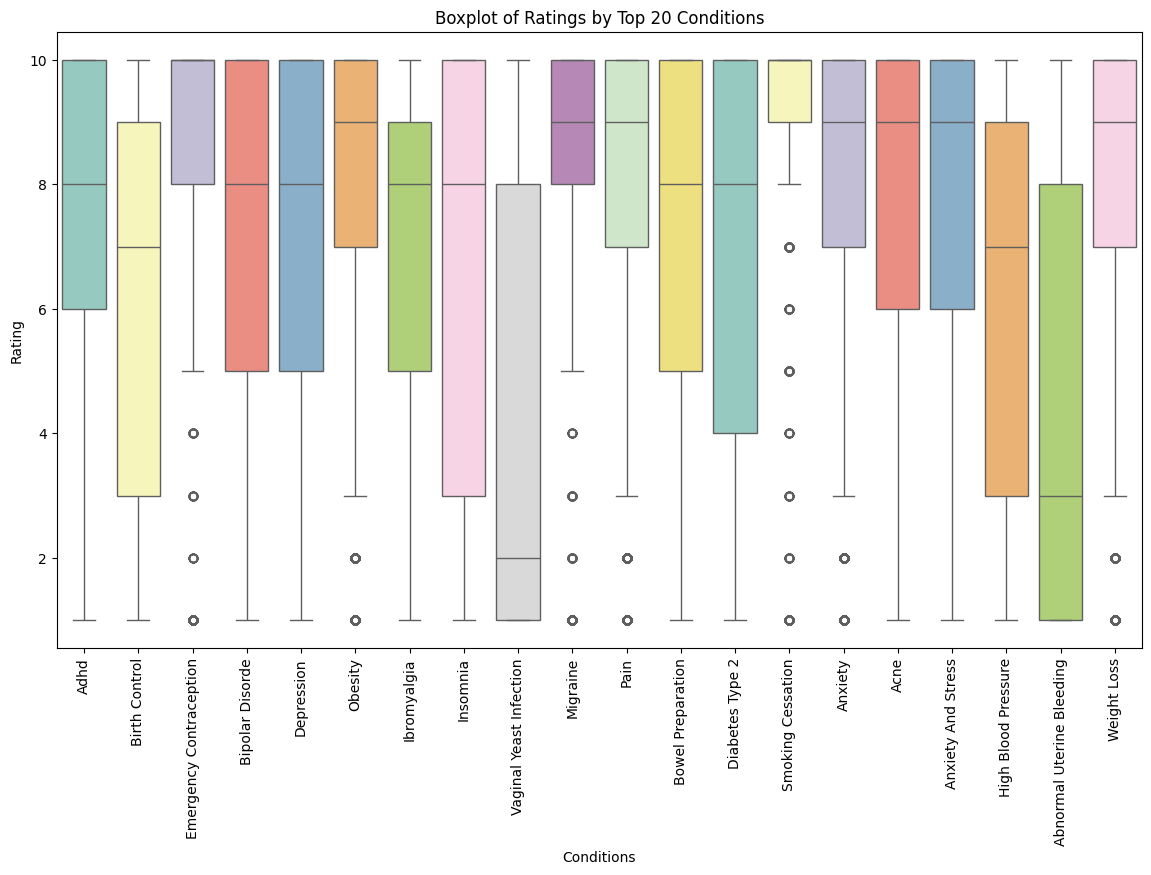

In [ ]:
# 5. Correlation Between Conditions and Ratings
plt.figure(figsize=(5, 4))
top_conditions_ratings = df[df['condition'].isin(top_conditions.index)]
sns.boxplot(x='condition', y='rating', data=top_conditions_ratings, palette='Set3')
plt.title('Boxplot of Ratings by Top 20 Conditions')
plt.xlabel('Conditions')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

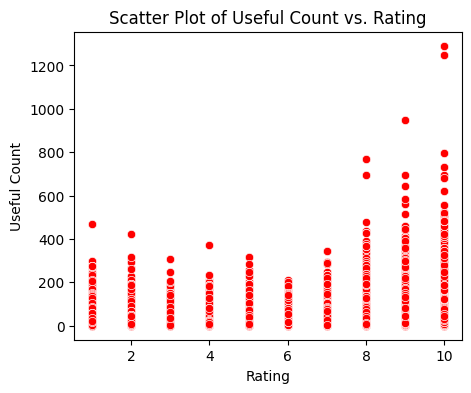

In [ ]:
# 6. Useful Count vs. Rating
plt.figure(figsize=(5, 4))
sns.scatterplot(x='rating', y='usefulCount', data=df, color='red')
plt.title('Scatter Plot of Useful Count vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

<ipython-input-15-f1d752364a5d>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


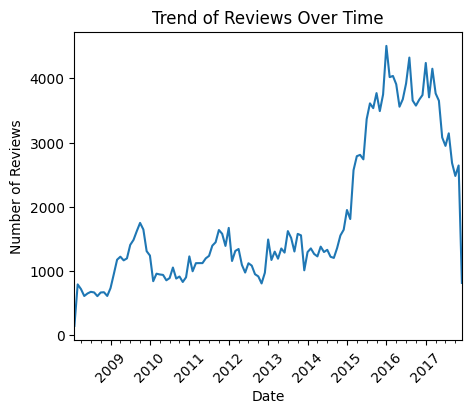

In [ ]:
# 8. Trend of Reviews Over Time
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')
plt.figure(figsize=(5, 4))
reviews_trend = df.groupby('year_month').size()
reviews_trend.plot()
plt.title('Trend of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

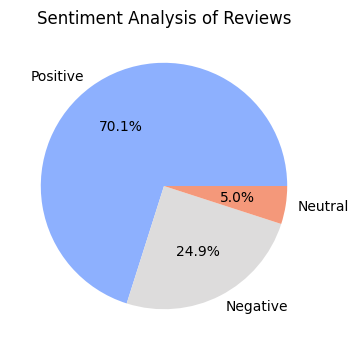

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
# Create the sentiment column based on the rating
df['sentiment'] = df['rating'].apply(lambda x: 'Positive' if x > 5 else ('Neutral' if x == 5 else 'Negative'))

sentiment_counts = df['sentiment'].value_counts()

# Plot the sentiment distribution as a pie chart
plt.figure(figsize=(5, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(sentiment_counts)))
plt.title('Sentiment Analysis of Reviews')
plt.show()

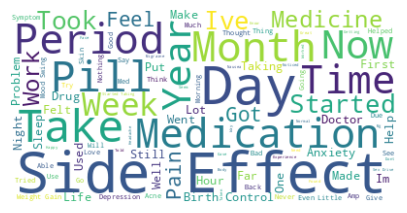

In [ ]:
# 10. Word Cloud for Common Words in Reviews
plt.figure(figsize=(5, 6))
text = " ".join(review for review in df.review.dropna())
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()